### Temperature Forecast Project using ML

#### Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day ( °C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day ( °C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate ( °C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate ( °C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude ( °): 37.456 to 37.645
20. lon - Longitude ( °): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope ( °): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature ( °C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature ( °C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [1]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
temp_data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
temp_data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
temp_data.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
# checking for column names and dimensions
print(temp_data.columns)
print()
print("Shape of the Dataset :", temp_data.shape)

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Shape of the Dataset : (7752, 25)


The dataset contains 7752 rows and 25 columns.
The target variables are -- Next_Tmax and Next_Tmin.

In [6]:
# summary of the dataset
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


The dataset conatins two types of datatypes float(numerical) and object(categorical). Date column is not in datetime format, we will convert it into datetime.

In [7]:
# Convert the 'Date' column to datetime
temp_data['Date'] = pd.to_datetime(temp_data['Date'])

In [8]:
temp_data.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [9]:
temp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


We can see that the count of each column is difference suggesting the presence of of null values or missing values.
There are 25 different stations from where data has been recorded.

In [10]:
# checking for null values in each column
temp_data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Some of the features like Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 have mising value that are around 1% of the total data. For the other columns, this number is varies from 0-27. Since, the number of missing values is small, we will drop the rows will missing values.

In [11]:
temp_data = temp_data.dropna(axis=0).reset_index()

In [12]:
temp_data.isna().sum()

index               0
station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

162 rows were dropped with missing values.

In [13]:
# unique values in each column
temp_data.nunique()

index               7588
station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

Data is recorded for 307 different days.

In [14]:
# checking for skewness in the datsaet
temp_data.skew()

index               0.013037
station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

SKewness is present in many columns.

**Columns lat, lon, DEM, Slope, station have very small number of unique values as compared to the total number of rows. SO, we will consider these columns as categorical columns.**

19.5844     307
208.5070    307
15.5876     307
56.4448     307
53.4712     307
44.7624     307
33.3068     306
45.7160     306
59.8324     305
82.2912     304
146.5540    304
26.2980     304
30.9680     303
212.3350    303
50.9312     302
132.1180    302
30.0464     302
75.0924     302
21.9668     302
17.2956     302
28.7000     301
12.3700     301
54.6384     301
52.5180     300
35.0380     296
Name: DEM, dtype: int64


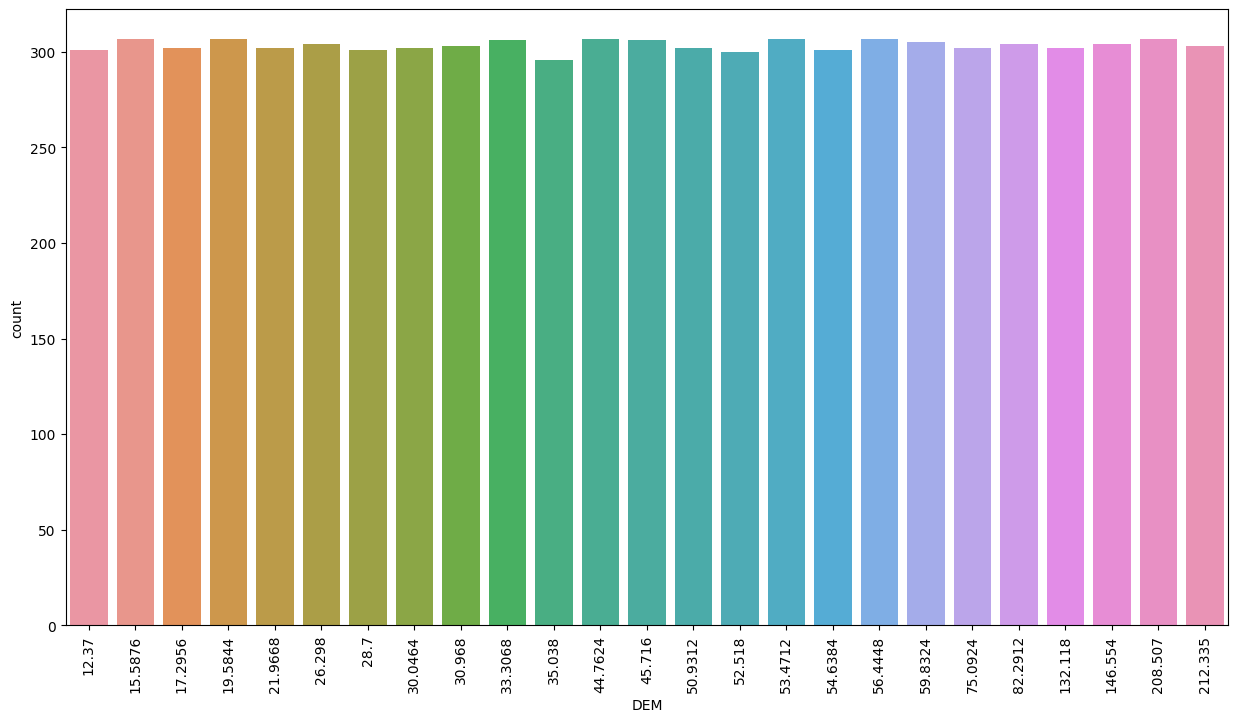

In [15]:
# plotting categorical data

print(temp_data['DEM'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=temp_data)
plt.xticks(rotation=90)
plt.show()

0.2713    307
5.1782    307
0.1554    307
1.2313    307
0.6970    307
0.5141    307
0.2661    306
2.5348    306
2.6865    305
2.2579    304
4.7296    304
0.5721    304
0.6180    303
2.7850    303
0.4125    302
0.5931    302
0.8552    302
1.7678    302
0.1332    302
0.2223    302
0.6233    301
0.0985    301
0.1457    301
1.5629    300
0.5055    296
Name: Slope, dtype: int64


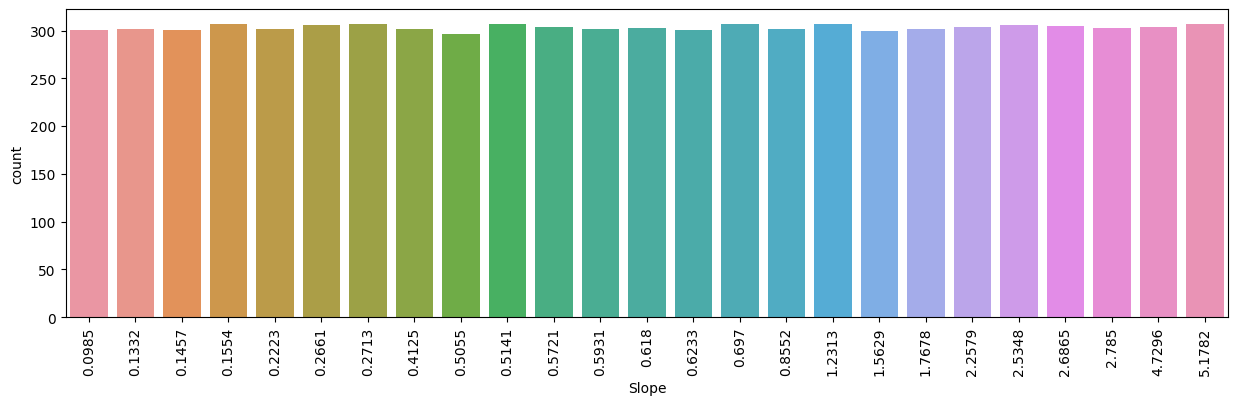

In [16]:
print(temp_data['Slope'].value_counts())
plt.figure(figsize=(15,4))
sns.countplot(x='Slope',data=temp_data)
plt.xticks(rotation=90)
plt.show()

25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64


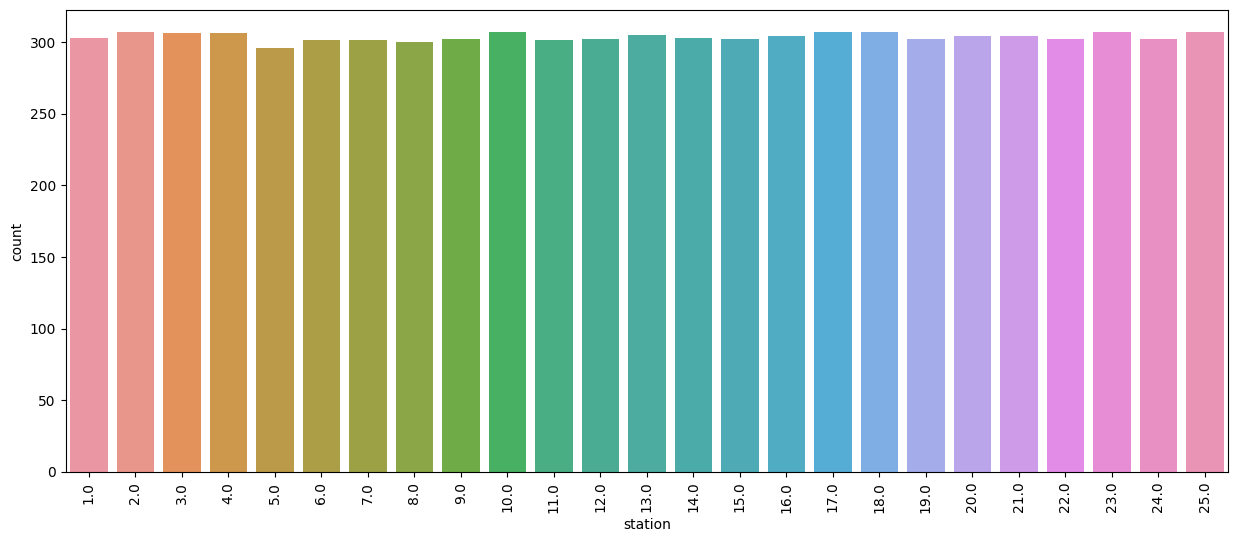

In [17]:
print(temp_data['station'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x='station',data=temp_data)
plt.xticks(rotation=90)
plt.show()

The Minimum Present_Tmax is  20.0
The Maximum Present_Tmax is  37.6
The Minimum Present_Tmin is  11.3
The Maximum Present_Tmin is  29.9


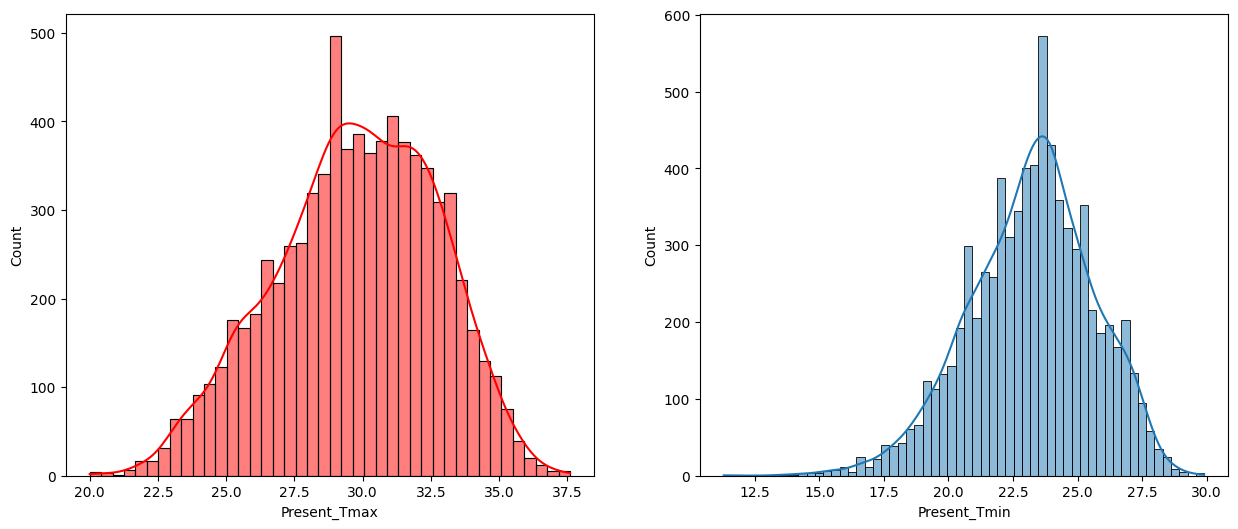

In [18]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(temp_data['Present_Tmax'],kde=True,color='r')
print("The Minimum Present_Tmax is ", temp_data['Present_Tmax'].min())
print("The Maximum Present_Tmax is ", temp_data['Present_Tmax'].max())

plt.subplot(1,2,2)
sns.histplot(temp_data['Present_Tmin'],kde=True)
print("The Minimum Present_Tmin is ", temp_data['Present_Tmin'].min())
print("The Maximum Present_Tmin is ", temp_data['Present_Tmin'].max())
plt.show()

The Minimum LDAPS_RHmin is  19.79466629
The Maximum LDAPS_RHmin is  98.5247345
The Minimum LDAPS_RHmax is  58.93628311
The Maximum LDAPS_RHmax is  100.0001526


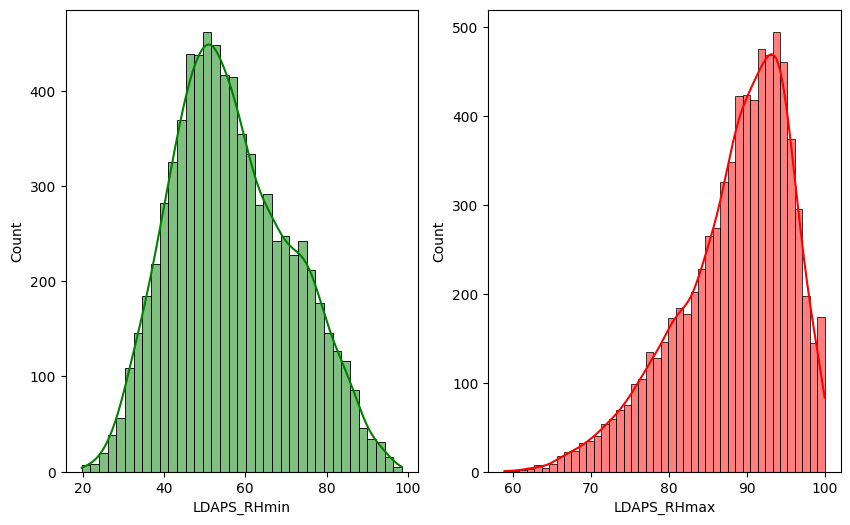

In [19]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(temp_data['LDAPS_RHmin'],kde=True,color='green')
print("The Minimum LDAPS_RHmin is ", temp_data['LDAPS_RHmin'].min())
print("The Maximum LDAPS_RHmin is ", temp_data['LDAPS_RHmin'].max())

plt.subplot(1,2,2)
sns.histplot(temp_data['LDAPS_RHmax'],kde=True,color='red')
print("The Minimum LDAPS_RHmax is ", temp_data['LDAPS_RHmax'].min())
print("The Maximum LDAPS_RHmax is ", temp_data['LDAPS_RHmax'].max())

plt.show()

The Minimum and Maximum value for next-day maximum air temp lapse rate is 17.62495378 and 38.54225522 respectively
The Minimum and Maximum value for next-day minimum air temp lapse rate is 14.27264631 and 29.61934244 respectively


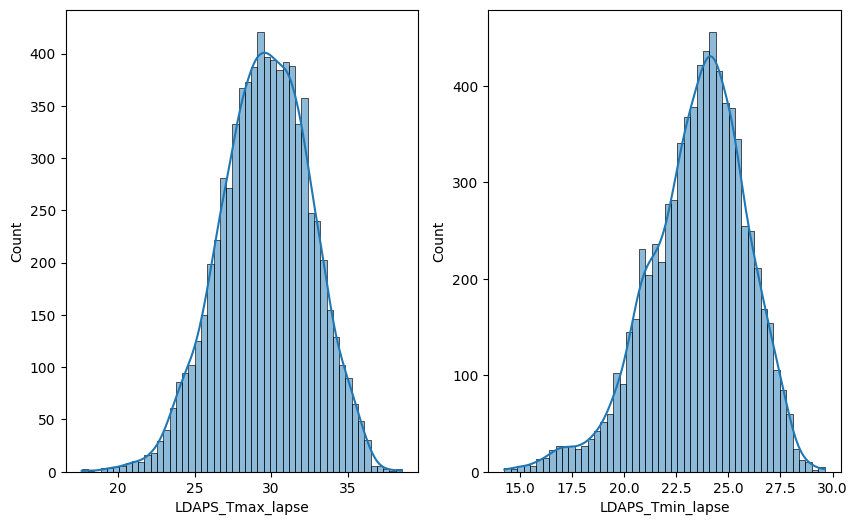

In [20]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(temp_data['LDAPS_Tmax_lapse'],kde=True)
print("The Minimum and Maximum value for next-day maximum air temp lapse rate is {} and {} respectively".format(temp_data['LDAPS_Tmax_lapse'].min(),temp_data['LDAPS_Tmax_lapse'].max()))

plt.subplot(1,2,2)
sns.histplot(temp_data['LDAPS_Tmin_lapse'],kde=True)
print("The Minimum and Maximum value for next-day minimum air temp lapse rate is {} and {} respectively".format(temp_data['LDAPS_Tmin_lapse'].min(),temp_data['LDAPS_Tmin_lapse'].max()))

plt.show()

The Minimum and Maximum value for next-day average wind speed is 2.882579625 and 21.85762099 respectively
The Minimum and Maximum value for next-day latent heat flux is -13.60321209 and 213.4140062 respectively


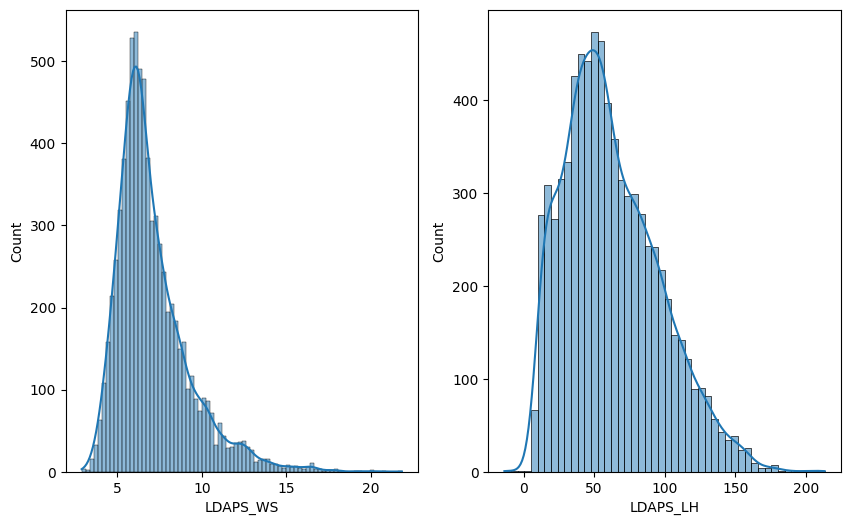

In [21]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(temp_data['LDAPS_WS'],kde=True)
print("The Minimum and Maximum value for next-day average wind speed is {} and {} respectively".format(temp_data['LDAPS_WS'].min(),temp_data['LDAPS_WS'].max()))

plt.subplot(1,2,2)
sns.histplot(temp_data['LDAPS_LH'],kde=True)
print("The Minimum and Maximum value for next-day latent heat flux is {} and {} respectively".format(temp_data['LDAPS_LH'].min(),temp_data['LDAPS_LH'].max()))

plt.show()

The Minimum value for solar radiation is  4329.520508
The Maximum value for solar radiation is  5992.895996


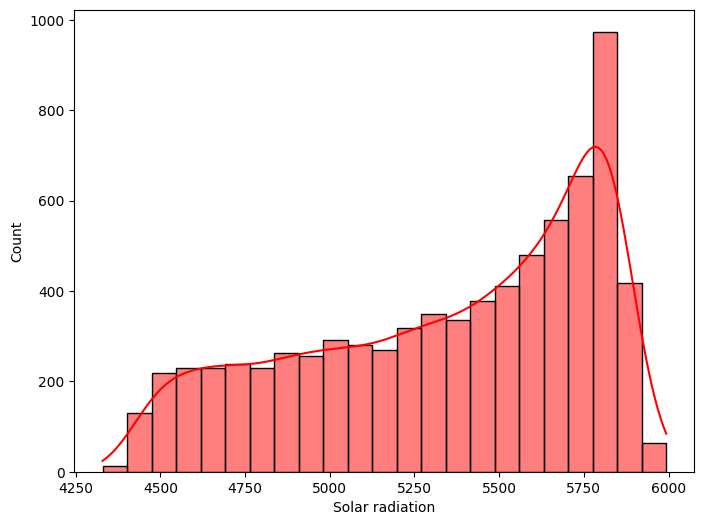

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(temp_data['Solar radiation'],kde=True,color='r')
print("The Minimum value for solar radiation is ", temp_data['Solar radiation'].min())
print("The Maximum value for solar radiation is ", temp_data['Solar radiation'].max())
plt.show()

In [23]:
# This is a regression problem and Next_Tmax, Next_Tmin are the target column

X= temp_data.drop(['Next_Tmax','Next_Tmin','Date','index'], axis=1)
y1 = temp_data['Next_Tmax']
y2 = temp_data['Next_Tmin']

# remove skewness

# Identify the columns to transform
columns_to_transform = ['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']

# Apply log transformation to selected columns
for column in columns_to_transform:
    X[column] = np.cbrt(X[column])

In [24]:
X.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          1.955868
LDAPS_PPT2          2.267487
LDAPS_PPT3          2.575795
LDAPS_PPT4          2.837790
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
dtype: float64

In [25]:
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)


#### For calculating Next_Tmax

In [27]:
# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X,y1, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (5311, 22)
X_test shape (2277, 22)
y_train shape (5311,)
y_test shape (2277,)


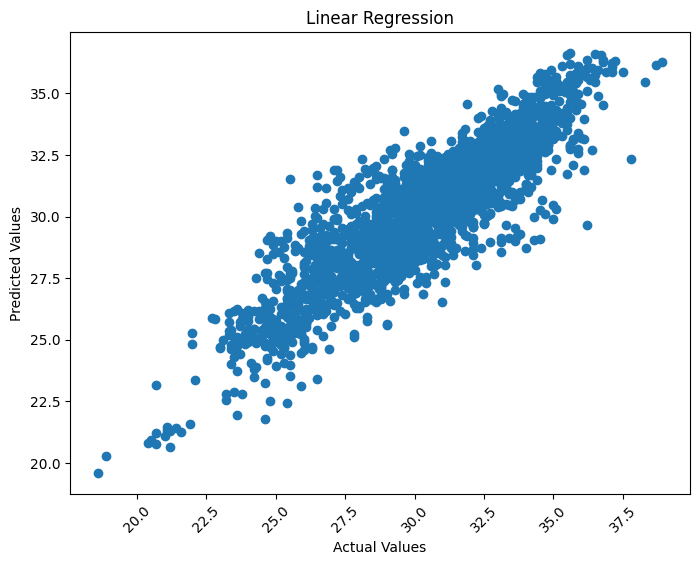

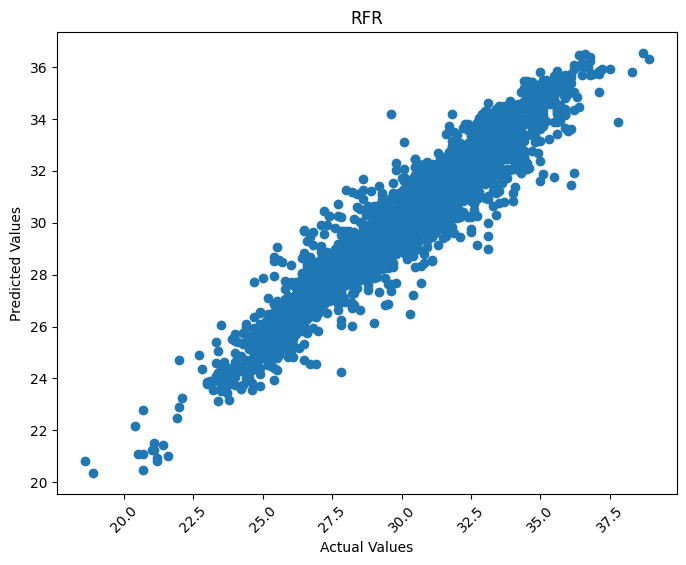

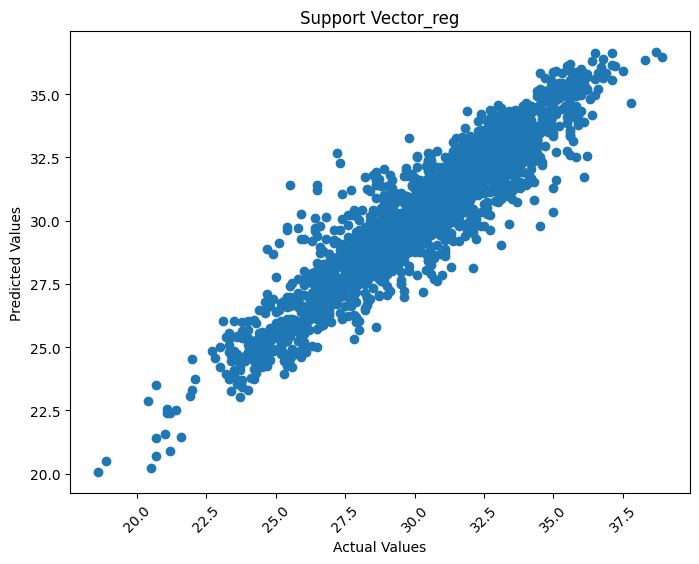

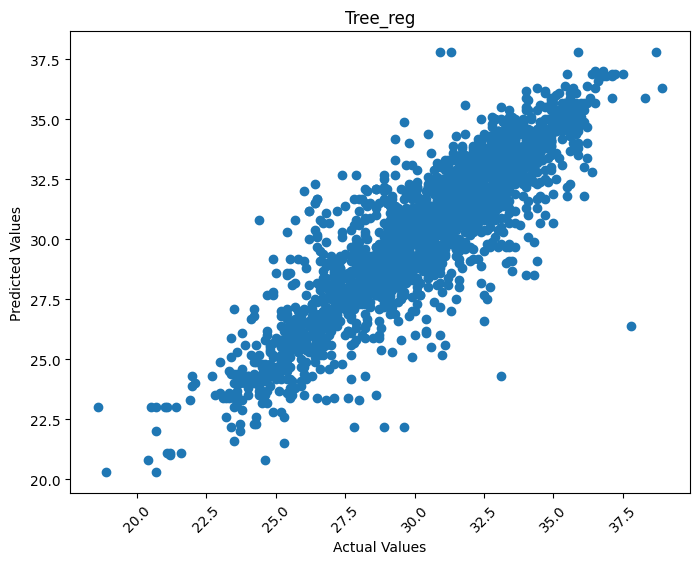

In [28]:
# importing libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = [('Linear Regression', LinearRegression()),
          ('RFR', RandomForestRegressor()),('Support Vector_reg', SVR()),
          ('Tree_reg', DecisionTreeRegressor())]

predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((name, y_pred))

# Plotting the predicted vs actual values
for name, y_pred in predictions:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.show()

In [29]:
metrics = []
for name, y_pred in predictions:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append((name, r2, mse, rmse, mae))

# Creating metrics dataframe
metrics_df = pd.DataFrame(metrics, columns=['Model_name', 'R2_score', 'Mean_Squared_Error',
                                            'Root_Mean_Squared_Error', 'Mean_Absolute_Error'])

metrics_df

,Model_name,R2_score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error
0,Linear Regression,0.782538,2.083789,1.443533,1.095637
1,RFR,0.897507,0.982117,0.991018,0.741051
2,Support Vector_reg,0.871151,1.234667,1.111156,0.816056
3,Tree_reg,0.761933,2.281230,1.510374,1.064032


1. Random Forest Regression (RFR) appears to have the best performance, with the highest R2 score and lowest MSE, RMSE, and MAE.
2. Decision Tree Regression (Tree_reg) has lower performance compared to the other models, with lower R2 score and higher error metrics.

In [30]:
# using cross val score on the  regressors
for name, model in models:
    cv_score = cross_val_score(model, X, y1, cv=5)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Diffrenece between Mean CV Score and R2 score", (r2_score(y_test,y_pred)-cv_score.mean()))
    print("\n")

Model : Linear Regression
cv_score : [0.71050917 0.66288337 0.69824901 0.80672411 0.71454973]
Mean Score 0.7185830778569645
Diffrenece between Mean CV Score and R2 score 0.04334984966208866


Model : RFR
cv_score : [0.71775916 0.65732865 0.63938545 0.79460197 0.66098592]
Mean Score 0.6940122317336999
Diffrenece between Mean CV Score and R2 score 0.06792069578535331


Model : Support Vector_reg
cv_score : [0.66653491 0.59237129 0.6770016  0.77456989 0.69633131]
Mean Score 0.6813617987863098
Diffrenece between Mean CV Score and R2 score 0.08057112873274341


Model : Tree_reg
cv_score : [0.36836084 0.43586487 0.27961635 0.64082569 0.47658292]
Mean Score 0.4402501308965257
Diffrenece between Mean CV Score and R2 score 0.32168279662252747




Considering both the R2 scores, CV scores, and the differences between them, Random Forest Regression (RFR) seems to overfit the training data more than the other models. Linear Regression and Support Vector Regression (Support Vector_reg) show better generalization to unseen data based on the smaller differences between R2 scores and mean CV scores. Decision Tree Regression (Tree_reg) appears to have the most significant overfitting issue among the models.

In [31]:
# SVM is the best model based on the overall metrics among all the models.
# hyper parameter tuning on SVM
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}
grid_search = GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid_search.fit(X,y1)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [32]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [35]:
# final model to calculate Next_Tmax
final_max = SVR(kernel='linear',C=0.1,gamma='scale')
final_max.fit(X_train,y_train)
final_pred = final_max.predict(X_test)
print("R2_score :", r2_score(y_test,final_pred))

R2_score : 0.7805812704344819


In [38]:
# saving the model
import joblib
joblib.dump(final_max, "Next_Tmax.pkl")

['Next_Tmax.pkl']

In [39]:
# predicting on the X with the saved model
#loading the saved model
model = joblib.load("Next_Tmax.pkl")

# prediction
prediction = model.predict(X)
prediction[:10]

array([29.12134124, 30.90492585, 30.77918647, 31.50620926, 30.87663748,
       30.51754545, 31.14123479, 30.62753576, 30.38529513, 29.66190478])

In [40]:
# comparing actual values and predicted values
pred = pd.DataFrame({'predicted':prediction, 'actual':y1})
pred.head(10)

,predicted,actual
0,29.121341,29.1
1,30.904926,30.5
2,30.779186,31.1
3,31.506209,31.7
4,30.876637,31.2
5,30.517545,31.5
6,31.141235,30.9
7,30.627536,31.1
8,30.385295,31.3
9,29.661905,30.5


#### For calculaing Next_Tmin

In [41]:
# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X,y2, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (5311, 22)
X_test shape (2277, 22)
y_train shape (5311,)
y_test shape (2277,)


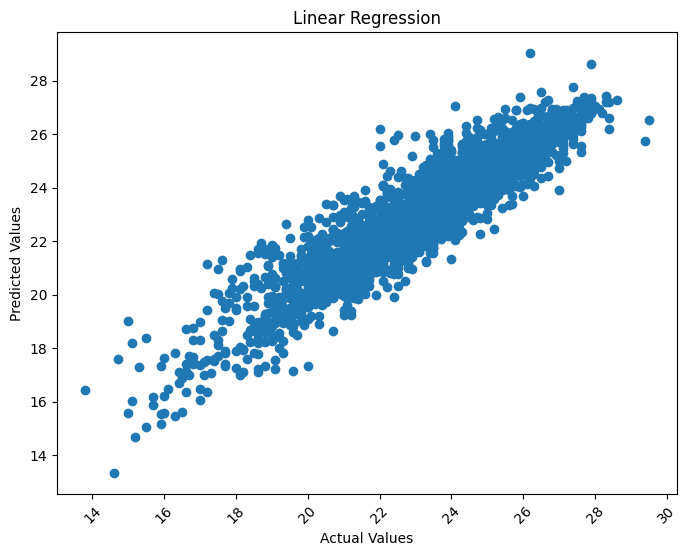

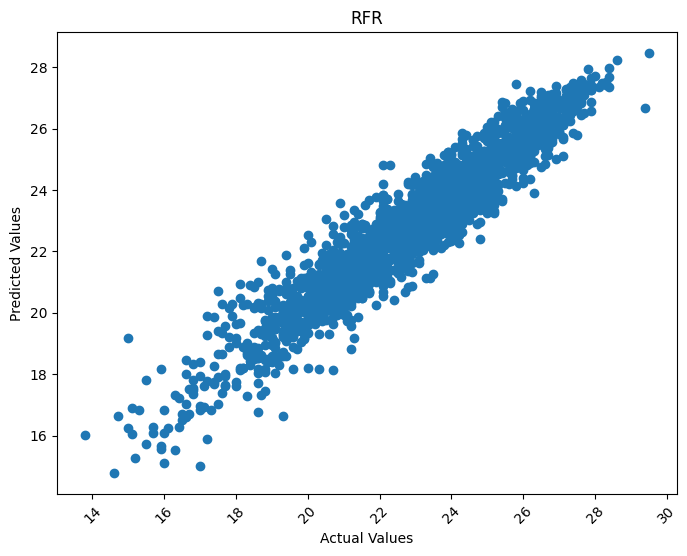

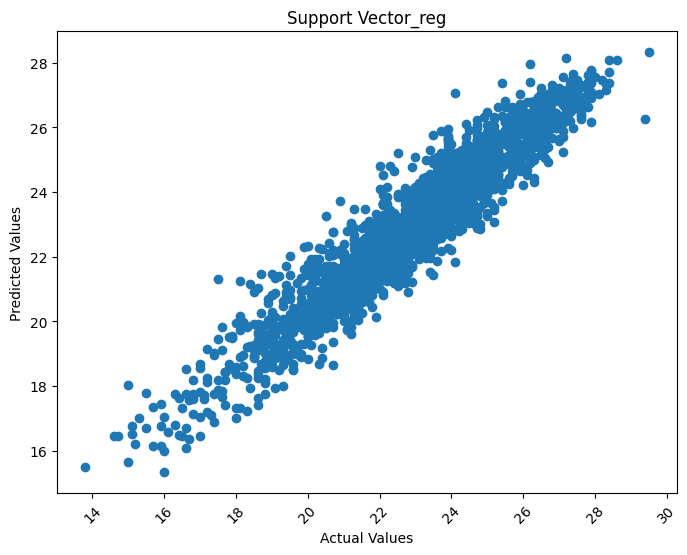

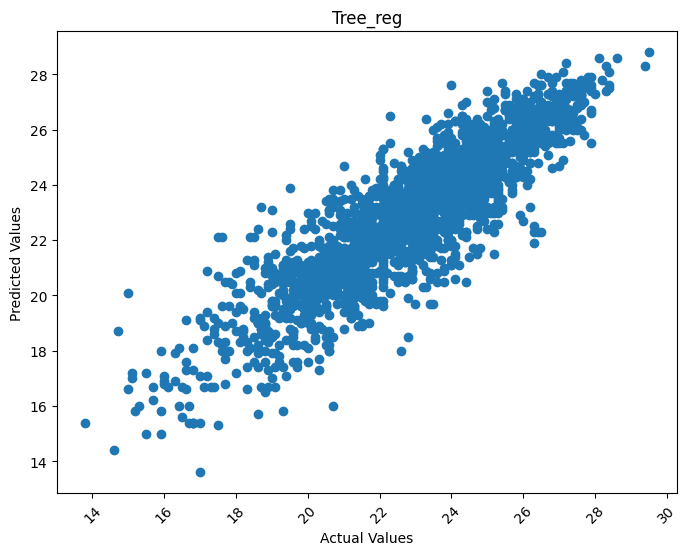

In [42]:
# importing libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = [('Linear Regression', LinearRegression()),
          ('RFR', RandomForestRegressor()),('Support Vector_reg', SVR()),
          ('Tree_reg', DecisionTreeRegressor())]

predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((name, y_pred))

# Plotting the predicted vs actual values
for name, y_pred in predictions:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.show()

In [43]:
metrics = []
for name, y_pred in predictions:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append((name, r2, mse, rmse, mae))

# Creating metrics dataframe
metrics_df = pd.DataFrame(metrics, columns=['Model_name', 'R2_score', 'Mean_Squared_Error',
                                            'Root_Mean_Squared_Error', 'Mean_Absolute_Error'])

metrics_df

,Model_name,R2_score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error
0,Linear Regression,0.835286,0.995668,0.997832,0.771455
1,RFR,0.901535,0.595201,0.771493,0.583678
2,Support Vector_reg,0.902141,0.591540,0.769116,0.584869
3,Tree_reg,0.765126,1.419772,1.191542,0.890294


In [44]:
# using cross val score on the  regressors
for name, model in models:
    cv_score = cross_val_score(model, X, y1, cv=5)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Diffrenece between Mean CV Score and R2 score", (r2_score(y_test,y_pred)-cv_score.mean()))
    print("\n")

Model : Linear Regression
cv_score : [0.71050917 0.66288337 0.69824901 0.80672411 0.71454973]
Mean Score 0.7185830778569645
Diffrenece between Mean CV Score and R2 score 0.04654262654740726


Model : RFR
cv_score : [0.71036635 0.64966357 0.63808604 0.79501522 0.65954481]
Mean Score 0.6905351987767769
Diffrenece between Mean CV Score and R2 score 0.07459050562759484


Model : Support Vector_reg
cv_score : [0.66653491 0.59237129 0.6770016  0.77456989 0.69633131]
Mean Score 0.6813617987863098
Diffrenece between Mean CV Score and R2 score 0.08376390561806202


Model : Tree_reg
cv_score : [0.33121069 0.42255559 0.29853642 0.61771    0.48549824]
Mean Score 0.43110218967550484
Diffrenece between Mean CV Score and R2 score 0.33402351472886693




Based on the R2 scores, Support Vector_reg has the highest R2 score, indicating better explanation of variance in the target variable. Additionally, the difference between the R2 score and mean CV score for Support Vector_reg is relatively small, suggesting good generalization performance.
While Random Forest Regression (RFR) also has a high R2 score, the difference between its R2 score and mean CV score is slightly higher than that of Support Vector_reg.

In [45]:
# SVM is the best model based on the overall metrics among all the models.
# hyper parameter tuning on SVM
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}
grid_search = GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid_search.fit(X,y1)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [46]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [48]:
# final model to calculate Next_Tmin
final_min = SVR(kernel='linear',C=0.1,gamma='scale')
final_min.fit(X_train,y_train)
final_pred = final_min.predict(X_test)
print("R2_score :", r2_score(y_test,final_pred))

R2_score : 0.8345181455768638


In [49]:
# saving the model
import joblib
joblib.dump(final_min, "Next_Tmin.pkl")

['Next_Tmin.pkl']

In [50]:
# predicting on the X with the saved model
#loading the saved model
model = joblib.load("Next_Tmin.pkl")

# prediction
prediction = model.predict(X)
prediction[:10]

array([21.5057405 , 22.9156109 , 23.60947724, 23.45164518, 22.74867648,
       23.12259638, 23.9418354 , 23.43641209, 22.56640477, 21.53350136])

In [51]:
# comparing actual values and predicted values
pred = pd.DataFrame({'predicted':prediction, 'actual':y2})
pred.head(10)

,predicted,actual
0,21.505741,21.2
1,22.915611,22.5
2,23.609477,23.9
3,23.451645,24.3
4,22.748676,22.5
5,23.122596,24.0
6,23.941835,23.4
7,23.436412,22.9
8,22.566405,21.6
9,21.533501,21.0
